In [328]:
from scipy.stats import norm, bootstrap
import numpy as np
from matplotlib.pyplot import vlines, show, legend
import seaborn as sns

In [329]:
seed = 42
np.random.seed(seed)

In [330]:
mu = 0
std = 1

alpha = 0.05
N = 100

norm_rv = norm(mu, std)
norm_rvs = norm_rv.rvs(size=N)
# norm_rvs

# Ручное исследование методом bootstrap

In [331]:
B = 10000

mass_test = [norm_rvs[np.random.choice(len(norm_rvs), size=N)] for _ in range(B)]
# mass_test

In [332]:
mass_params = [sample.mean() for sample in mass_test]
# mass_params

In [333]:
total_sample_param = sum(mass_params) / B
total_sample_param

-0.10487297363269858

## Доверительный интервал методом перцентилей

In [334]:
index_l = int(B * alpha / 2)
index_r = int(B * (1 - alpha / 2))
print(index_l, index_r)

ci_p = [mass_params[index_l], mass_params[index_r]]
ci_p

250 9750


[-0.08886582049747266, -0.13964852766532057]

## Доверительный интервал методом квантилей

In [335]:
std_var = sum((param_i - total_sample_param) ** 2 for param_i in mass_params) / B

ci_q = [total_sample_param - norm.ppf(1 - alpha / 2) * (std_var / np.sqrt(N)),
        total_sample_param + norm.ppf(1 - alpha / 2) * (std_var / np.sqrt(N))]
ci_q

[-0.10645204883913655, -0.10329389842626062]

# Исследование через scipy

In [336]:
bootstr = bootstrap((norm_rvs,), np.mean, n_resamples=B, confidence_level=1 - alpha)
ci_b = bootstr.confidence_interval
ci_b

ConfidenceInterval(low=-0.2780502767784814, high=0.07577975560021348)

# Графическое отображение

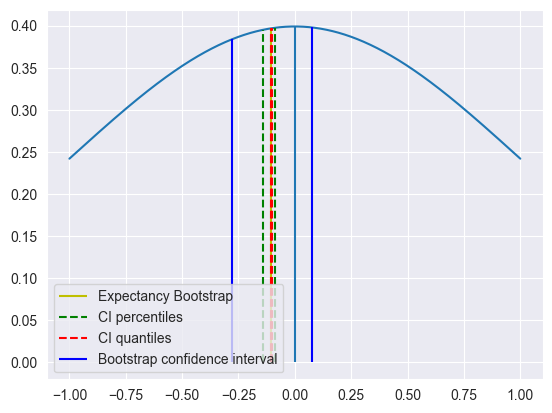

In [337]:
x = np.linspace(norm_rv.mean() - 1 * norm_rv.std(), norm_rv.mean() + 1 * norm_rv.std(), 1000)

sns.lineplot(x=x, y=norm_rv.pdf(x))
vlines(x=norm_rv.mean(), ymin=0, ymax=norm_rv.pdf(norm_rv.mean()))

vlines(x=total_sample_param, ymin=0, ymax=norm.pdf(total_sample_param), color='y', label='Expectancy Bootstrap')

vlines(x=ci_p, ymin=0, ymax=norm.pdf(ci_p), color='g', linestyles="--", label="CI percentiles")
vlines(x=ci_q, ymin=0, ymax=norm.pdf(ci_q), color='r', linestyles="--", label="CI quantiles")

vlines(x=ci_b, ymin=0, ymax=norm.pdf(ci_b), color='b', label="Bootstrap confidence interval")

legend()
show()